In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
from surprise.reader import Reader
from surprise import SVD, Dataset, accuracy, SVDpp
from sklearn.decomposition import PCA
np.random.seed(69)
%matplotlib inline

In [108]:
movie_df = pd.read_csv('data/movies_c.txt', delimiter='\t', header=None,
                       names=["Movie Id", "Movie Title", "Unknown", "Action", 
                              "Adventure", "Animation", "Childrens", "Comedy", 
                              "Crime", "Documentary", "Drama", "Fantasy", 
                              "Film-Noir", "Horror", "Musical", "Mystery", 
                              "Romance", "Sci-Fi", "Thriller", "War", 
                              "Western"])

data_df = pd.read_csv('data/data_c.txt', delimiter='\t', header=None,
                      names=["User Id", "Movie Id", "Rating"])
train_df = pd.read_csv('data/train_c.txt', delimiter='\t', header=None,
                      names=["User Id", "Movie Id", "Rating"])
test_df = pd.read_csv('data/test_c.txt', delimiter='\t', header=None,
                      names=["User Id", "Movie Id", "Rating"])

# 5)

In [140]:
Y = train_df.values
M = train_df["User Id"].max()
N = movie_df["Movie Id"].max()

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(train_df, reader)
trainset = data.build_full_trainset()

data = Dataset.load_from_df(test_df, reader)
testset = data.construct_testset(data.raw_ratings)

algo = SVDpp(n_factors = 20, n_epochs = 20, reg_all = 1e-3)
algo.fit(trainset)

U = algo.pu
V = algo.qi

predictions = algo.test(testset)
accuracy.rmse(predictions)**2

RMSE: 0.9318


0.8682574467134928

In [133]:
V_p = pca.fit_transform(V)
U_p = pca.transform(U)

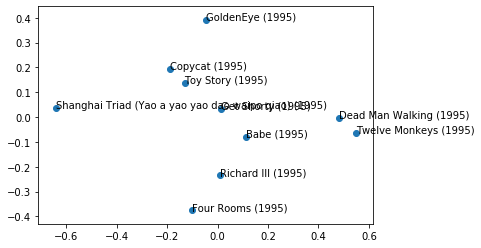

In [112]:
n_mov = 10
ax = plt.subplot(111)
ax.scatter(V_p[:n_mov, 0], V_p[:n_mov, 1])

for i, txt in enumerate(movie_df["Movie Title"][:n_mov]):
    ax.annotate(txt, (V_p[i, 0], V_p[i, 1]))

In [121]:
def get_err(U, V, Y, reg=0.0):
    """
    Takes as input a matrix Y of triples (i, j, Y_ij) where i is the index of a user,
    j is the index of a movie, and Y_ij is user i's rating of movie j and
    user/movie matrices U and V.

    Returns the mean regularized squared-error of predictions made by
    estimating Y_{ij} as the dot product of the ith row of U and the jth column of V^T.
    """
    Y2 = Y - np.array([[1, 1, 0]]) # Fix one-indexing
    reg_err = reg / 2 * (np.linalg.norm(U) ** 2 + np.linalg.norm(V) ** 2)
    Is, Js, Y_ij = Y2[:, 0], Y2[:, 1], Y2[:, 2]
    mse = np.sum((Y_ij - np.sum(U[Is] * V[Js], axis=1)) ** 2) / 2
    return (reg_err + mse) / Y.shape[0]

In [141]:
Y_test = test_df.values
print(get_err(U, V, Y))
print(get_err(U, V, Y_test))

6.902491240443745
6.89302599786253
